# Steps & Q&A

- the count of values in dataframe
- type filter/checker in dataframe
- the distribution of the dataset
- the skewness of the distribution of a dataset and how to fix it
- the duplication/uniqueness of sample (or a part(s) of sample(s))
- handling missing values


In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

df=pd.DataFrame(columns=['col1','col2','col3','col4'],index=['i1','i2','i3','i4','i5','i6'],data=[
    [1,2,3,np.nan],
    [4,5,np.nan,6],
    [8,8,8,8],
    [9,9,9,9],
    [np.nan,9,8,8],
    [99,np.nan,88,77],
])

df

,col1,col2,col3,col4
i1,1.0,2.0,3.0,NaN
i2,4.0,5.0,NaN,6.0
i3,8.0,8.0,8.0,8.0
i4,9.0,9.0,9.0,9.0
i5,NaN,9.0,8.0,8.0
i6,99.0,NaN,88.0,77.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, i1 to i6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col1    5 non-null      float64
 1   col2    5 non-null      float64
 2   col3    5 non-null      float64
 3   col4    5 non-null      float64
dtypes: float64(4)
memory usage: 240.0+ bytes


In [3]:
df.describe()

,col1,col2,col3,col4
count,5.000000,5.00000,5.000000,5.000000
mean,24.200000,6.60000,23.200000,21.600000
std,41.936857,3.04959,36.300138,30.988708
min,1.000000,2.00000,3.000000,6.000000
25%,4.000000,5.00000,8.000000,8.000000
50%,8.000000,8.00000,8.000000,8.000000
75%,9.000000,9.00000,9.000000,9.000000
max,99.000000,9.00000,88.000000,77.000000


In [4]:
df.value_counts("col1",sort=False) # value : count

col1
1.0     1
4.0     1
8.0     1
9.0     1
99.0    1
Name: count, dtype: int64

C:\Users\Fynn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


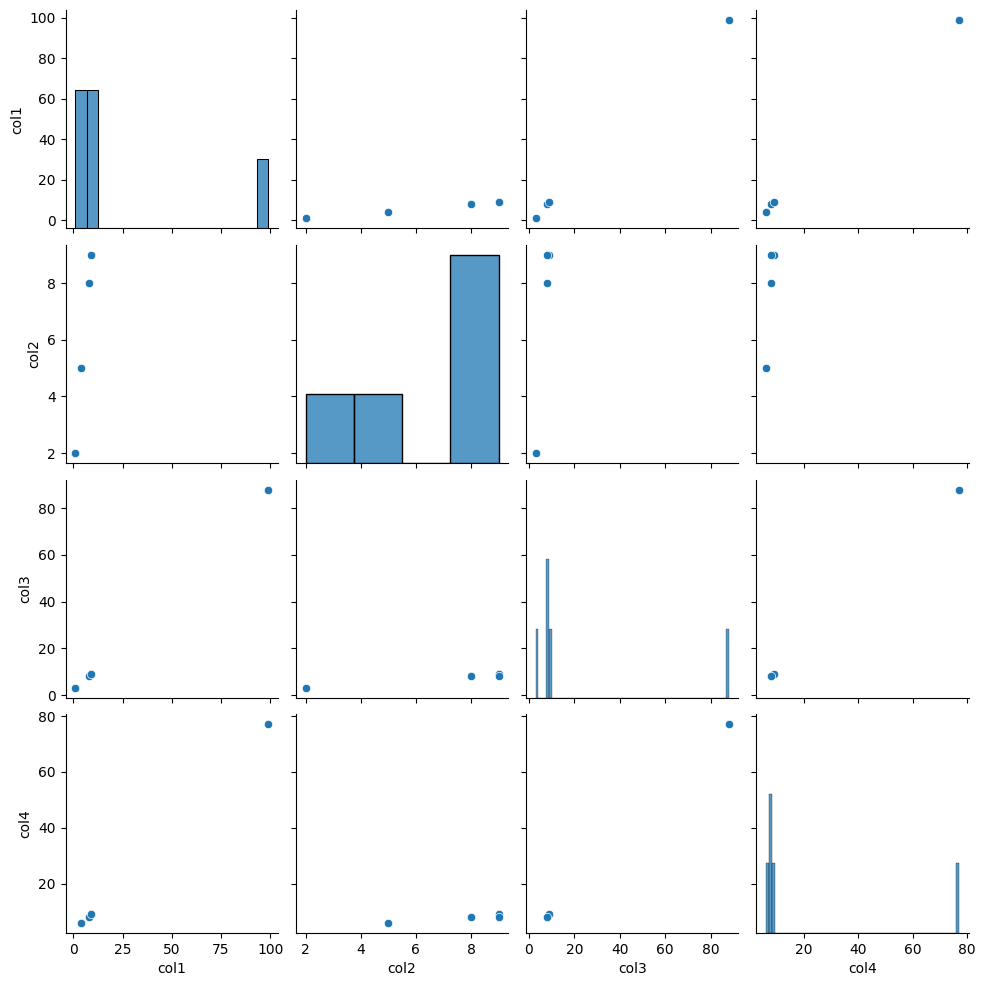

In [5]:
# use sns.pairplot() to spot the outliers
# pairwise correlation
sns.pairplot(df)

C:\Users\Fynn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


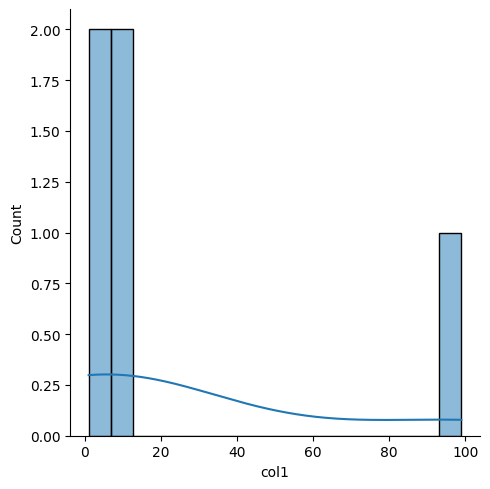

In [6]:
'''
About KDE Curve: 核密度估计曲线
https://zh.wikipedia.org/wiki/%E6%A0%B8%E5%AF%86%E5%BA%A6%E4%BC%B0%E8%AE%A1
'''

sns.displot(df['col1'], kde=True)  # show the distribution (and also kde curve)

In [7]:
'''· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical

· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed

· If the skewness is less than -1 or greater than 1, the data are highly skewed'''

# can simply check the skewness of df
# skewness: 偏度 (左偏/右偏)
# https://en.wikipedia.org/wiki/Skewness
df.skew()

col1    2.203351
col2   -1.043680
col3    2.212299
col4    2.229111
dtype: float64

In [8]:
# 首先需要把数据集调整到合适的分布 越接近正态分布/钟形曲线(symmetrical bell curve)越好
# 如何调整：将原来的数据进行函数变换：np.log, np.sqrt,scipy.stats.boxcox...
# 它并且可以纠正skewness
# 见 https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01
# https://juejin.cn/post/7112653943305404429

# box-cox变换
# https://baike.baidu.com/item/box-cox%E5%8F%98%E6%8D%A2/10278422#:~:text=Box%2DCox%E5%8F%98%E6%8D%A2%E6%98%AFBox,%E9%A2%84%E6%B5%8B%E5%8F%98%E9%87%8F%E7%9A%84%E7%9B%B8%E5%85%B3%E6%80%A7%E3%80%82
# 例如如下代码:

'''
 sp_transformed = sns.distplot(np.log(df['COL_NAME']))
 stats.boxcox(lotAreaCol)

 '''
 # If the lmbda parameter is None, the second returned argument is the lmbda that maximizes the log-likelihood function.


"\n sp_transformed = sns.distplot(np.log(df['COL_NAME']))\n stats.boxcox(lotAreaCol)\n\n "

In [9]:
df # reminder

,col1,col2,col3,col4
i1,1.0,2.0,3.0,NaN
i2,4.0,5.0,NaN,6.0
i3,8.0,8.0,8.0,8.0
i4,9.0,9.0,9.0,9.0
i5,NaN,9.0,8.0,8.0
i6,99.0,NaN,88.0,77.0


In [10]:
df.duplicated(['col3','col2'])

i1    False
i2    False
i3    False
i4    False
i5    False
i6    False
dtype: bool

In [11]:
# return columns that is completely duplicated from the given cols.
duplicate=df[df.duplicated(['col3','col2'])]
duplicate # because i5 duplicates row i3 at col2 and col3

,col1,col2,col3,col4


In [12]:
dup_removed = df.drop_duplicates()
dup_removed 

,col1,col2,col3,col4
i1,1.0,2.0,3.0,NaN
i2,4.0,5.0,NaN,6.0
i3,8.0,8.0,8.0,8.0
i4,9.0,9.0,9.0,9.0
i5,NaN,9.0,8.0,8.0
i6,99.0,NaN,88.0,77.0


In [13]:
# alternativly
df.index.is_unique

True

## Handling missing values/ NaN values/ Null values

In [14]:
df # reminder

,col1,col2,col3,col4
i1,1.0,2.0,3.0,NaN
i2,4.0,5.0,NaN,6.0
i3,8.0,8.0,8.0,8.0
i4,9.0,9.0,9.0,9.0
i5,NaN,9.0,8.0,8.0
i6,99.0,NaN,88.0,77.0


In [15]:
df.dropna(subset=['col1']) # drop the ROWS that contain NaN in "subset=[cols]"

,col1,col2,col3,col4
i1,1.0,2.0,3.0,NaN
i2,4.0,5.0,NaN,6.0
i3,8.0,8.0,8.0,8.0
i4,9.0,9.0,9.0,9.0
i6,99.0,NaN,88.0,77.0
